In [1]:
# Import related libraries, Advertising_df1_raw.csv and Advertising_df2_raw.csv datasets.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('Advertising_df1_raw.csv')
df2 = pd.read_csv('Advertising_df2_raw.csv')

In [2]:
# Read first 7 rows for df1.
df1.head(7)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8


In [3]:
# Read last 7 rows for df1.
df1.tail(7)

,Unnamed: 0,TV,Radio,Newspaper,Sales
92,93,217.7,33.5,59.0,19.4
93,94,250.9,36.5,72.3,22.2
94,95,107.4,14.0,10.9,11.5
95,96,163.3,31.6,52.9,16.9
96,97,197.6,3.5,5.9,11.7
97,98,184.9,21.0,22.0,15.5
98,99,289.7,42.3,51.2,25.4


In [4]:
# Read first 7 rows for df2.
df2.head(7)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,100,135.2,41.7,45.9,17.2
1,101,222.4,4.3,49.8,11.7
2,102,296.4,36.3,100.9,23.8
3,103,280.2,10.1,29.7,14.8
4,104,187.9,17.2,17.9,14.7
5,105,238.2,34.3,5.3,20.0
6,106,137.9,46.4,59.0,19.2


In [5]:
# Read last 7 rows for df2.
df2.tail(7)

,Unnamed: 0,TV,Radio,Newspaper,Sales
97,197,94.2,4.9,8.1,9.7
98,198,177.0,9.3,6.4,12.8
99,199,283.6,42.0,66.2,25.5
100,200,232.1,8.6,8.7,13.4
101,138,273.7,28.9,59.7,20.8
102,138,273.7,28.9,59.7,20.8
103,193,17.2,4.1,31.6,5.9


In [6]:
# Merge these two files and create/load the new merged file into your folder.
merged_Advertising = pd.concat(map(pd.read_csv, ['Advertising_df1_raw.csv', 'Advertising_df2_raw.csv']), ignore_index=True)
merged_Advertising.to_csv('merged_Advertising.csv')

In [7]:
# Remove the unnecessary columns (refer to attributes involved above).
merged_Advertising.pop('Unnamed: 0')

0        1
1        2
2        3
3        4
4        5
      ... 
198    199
199    200
200    138
201    138
202    193
Name: Unnamed: 0, Length: 203, dtype: int64

In [8]:
# Explore the merged data. Interpret your findings.
print('No of attributes/columns:', len(merged_Advertising.columns))
print('No of rows:', len(merged_Advertising))

No of attributes/columns: 4
No of rows: 203


In [9]:
# Check missing values.
merged_Advertising.isnull().sum()

TV           1
Radio        1
Newspaper    0
Sales        0
dtype: int64

In [10]:
# Find location of missing values in row for TV.
trace_missing_TV = pd.isnull(merged_Advertising['TV'])
merged_Advertising[trace_missing_TV]

,TV,Radio,Newspaper,Sales
115,NaN,35.0,52.7,12.6


In [11]:
# Find location of missing values in row for Radio.
trace_missing_Radio = pd.isnull(merged_Advertising['Radio'])
merged_Advertising[trace_missing_Radio]

,TV,Radio,Newspaper,Sales
113,209.6,NaN,10.7,15.9


In [12]:
# Treat missing value for TV attribute by replacing with mean
merged_Advertising.TV = merged_Advertising.TV.fillna(merged_Advertising.TV.mean())
merged_Advertising.isnull().sum()

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

In [13]:
# Treat missing value for Radio attribute by replacing with median
merged_Advertising.Radio = merged_Advertising.Radio.fillna(merged_Advertising.Radio.median())
merged_Advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
# Check duplicated data.
merged_Advertising[merged_Advertising.duplicated(keep=False)]

,TV,Radio,Newspaper,Sales
137,273.7,28.9,59.7,20.8
192,17.2,4.1,31.6,5.9
200,273.7,28.9,59.7,20.8
201,273.7,28.9,59.7,20.8
202,17.2,4.1,31.6,5.9


In [15]:
# Treat duplicated data by removing the duplicated data and keeping the first one.
merged_Advertising.drop_duplicates(keep='first', inplace=True)
merged_Advertising[merged_Advertising.duplicated(keep=False)]

,TV,Radio,Newspaper,Sales


In [16]:
# Load new clean data into your folder.
merged_Advertising.to_csv('clean_Advertising.csv')
data_clean = pd.read_csv('clean_Advertising.csv')
data_clean

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,195,38.2,3.7,13.8,7.6
196,196,94.2,4.9,8.1,9.7
197,197,177.0,9.3,6.4,12.8
198,198,283.6,42.0,66.2,25.5


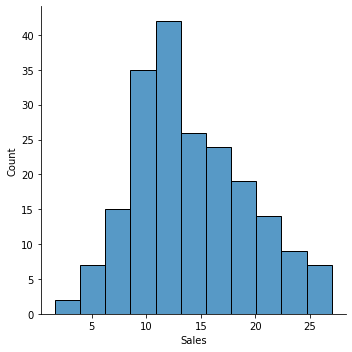

In [17]:
# Construct the histogram for the Sales attribute. Discuss the shape of the data distribution.
# Positively skewed
sns.displot(data_clean['Sales'])

Text(0.5, 1.0, 'Newspaper vs Sales')

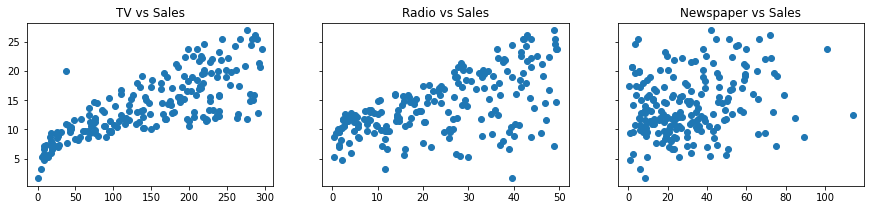

In [18]:
# Plot the three-correlation graphs for TV vs Sales, Radio vs Sales and Newspaper vs Sales. Interpret your findings.

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))

ax1.scatter(data_clean['TV'], data_clean['Sales'])
ax1.set_title('TV vs Sales')

ax2.scatter(data_clean['Radio'], data_clean['Sales'])
ax2.set_title('Radio vs Sales')

ax3.scatter(data_clean['Newspaper'], data_clean['Sales'])
ax3.set_title('Newspaper vs Sales')

In [19]:
# TV vs Sales has positive correlation. As the number of TV ads increase, the sales increase.
# Radio vs Sales has low positive correlation. As the number of radio ads increase, the sales increase.
# Newspaper vs Sales has no correlation. There is no trend to the data thus there is no correlation.